# TAREA SEMANAL 2
## Nicolas Albano 

La tarea semanal se basa en la resolucion del siguiente circuito contestando las siguientes consignas 
*  Hallar la transferencia T= Vo/Vi en función de ωo y Q

* Hallar los parámetros ωo y Q y k


* Obtener el valor de los componentes para que el circuito se comporte como un Butterworth de 2do orden.

* Cómo podría obtener un filtro pasabajo Butterworth de 4to orden, a partir de un prototipo basado en este circuito, y que cumpla con |T(0)|=20dB


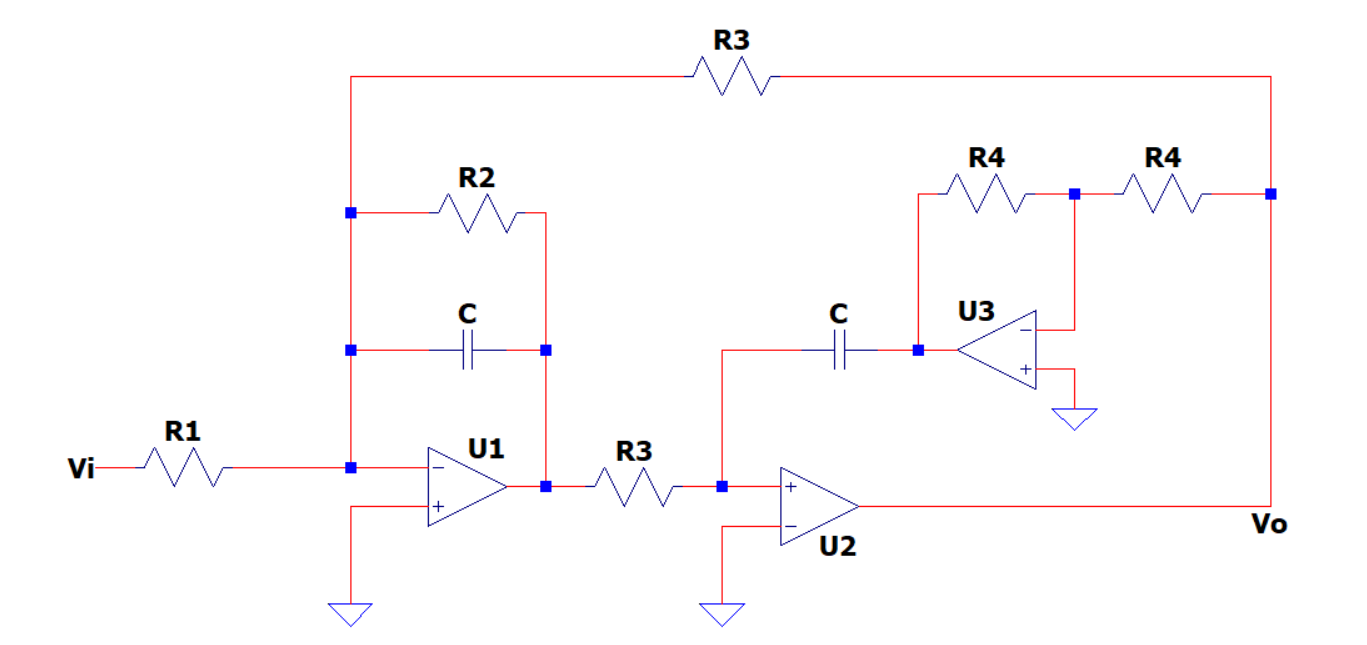


### Desarrollo en papel 


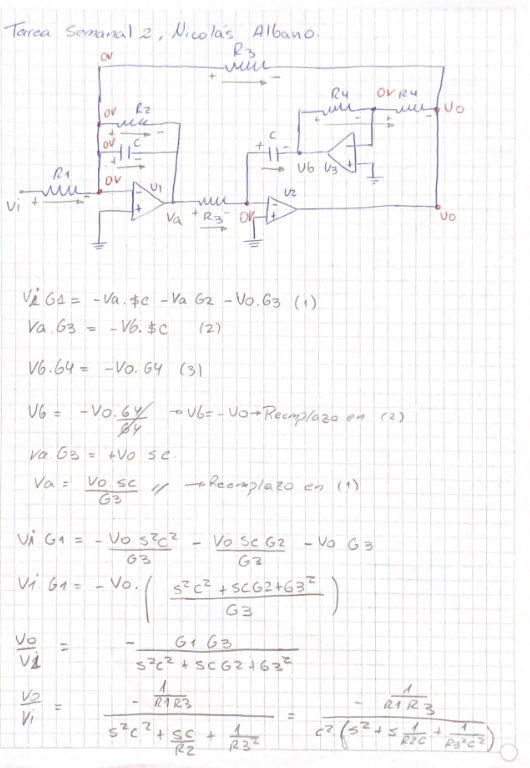

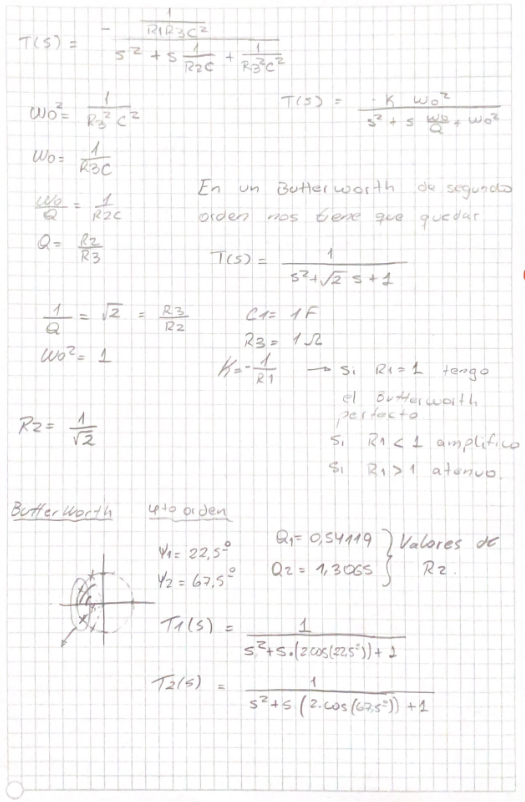


La transferencia entonces nos queda: 
\begin{equation}
T(s) = \frac{-\frac{1}{R1R3{C^2}}}{s^2 + s \frac{1}{R2C} + \frac{1}{R3^2C^2}}.
\end{equation}

Normalizando en frecuencia 

\begin{equation}
\omega_0² =\frac{1}{R3²C^2}
\end{equation}

Elijo R3 = 1 y C = 1 ya que con los otros componentes puedo modificar las otras caracteristicas del filtro

Para que sea un filtro Butterworth elijo 
\begin{equation} 
R2=\frac{1}{\sqrt{2}}
\end{equation}

Y con el 
\begin{equation} 
k=\frac{1}{R1}
\end{equation} 

puedo modificar la ganancia del filtro.

* Si R1= 1 entonces la ganancia es 1 
* Si R1> 1 atenuo 
* Si R1< 1 amplifico 


* Para el filtro de 4to orden de Butterworth con |T(0)| = 20 dB en podriamos poner en cascada dos de estos filtros modificando el valor de R2 para que tengan Q diferente y el de R1 para obtener la ganancia deseada 

Si 
\begin{equation}
Q=\frac{1}{2 cos(\phi)}
\end{equation}

El primer filtro debe tener un angulo = 22,5° y el segundo un angulo = 67,5°

\begin{equation}
R2_1=\frac{1}{2cos(22,5°)}
\end{equation}

\begin{equation}
R2_2=\frac{1}{2cos(67,5°)}
\end{equation}

Como quiero que gane 20 dB en 0 R1_1 = 0.1 

\begin{equation}
T(s1)=\frac{-10}{s²+s*2cos(22,5)+1}
\end{equation}

\begin{equation}
T(s2)=\frac{-1}{s²+s*2cos(67,5)+1}
\end{equation}

Llamando a = 2cos(22,5) y b = 2cos(67,5) nos queda 

\begin{equation}
T(s)=\frac{10}{s⁴+s³*(A+B)+s²(2+AB)+s*(A+B)+1}
\end{equation}



## Simulacion en Python del filtro 



TransferFunctionContinuous(
array([-1.]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

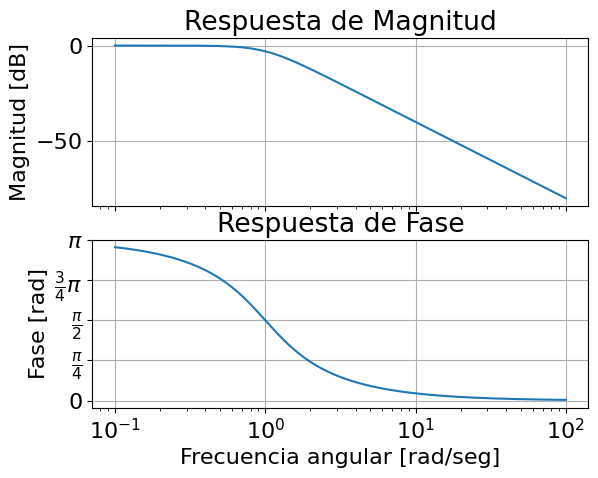

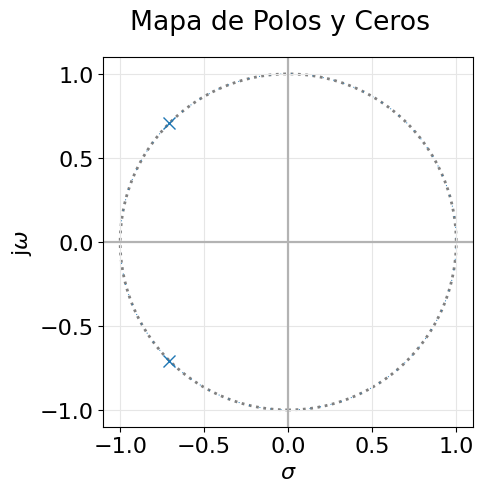

In [5]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
import math
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

from pytc2.general import print_subtitle
from IPython.display import IFrame
IFrame("./sos_pb_lapiz.pdf", width=1000, height=1000)

R1=1
R2=1 / math.sqrt(2)
R3=1
C=1


num=np.array([-1/(R1*R3*C**2)])
den=np.array([1.,1/R2*C,1/R3**2*C**2])

H1=sig.TransferFunction(num,den)
display(H1)


_, axes_hdl = bodePlot(H1)

plt.sca(axes_hdl[0])

pzmap(H1)

## Simulacion Butterworth de 4to orden 

TransferFunctionContinuous(
array([10.]),
array([1.        , 2.61312593, 3.41421356, 2.61312593, 1.        ]),
dt: None
)

TransferFunctionContinuous(
array([-10.]),
array([1.        , 1.84775907, 1.        ]),
dt: None
)

TransferFunctionContinuous(
array([-1.]),
array([1.        , 0.76536686, 1.        ]),
dt: None
)

(6, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

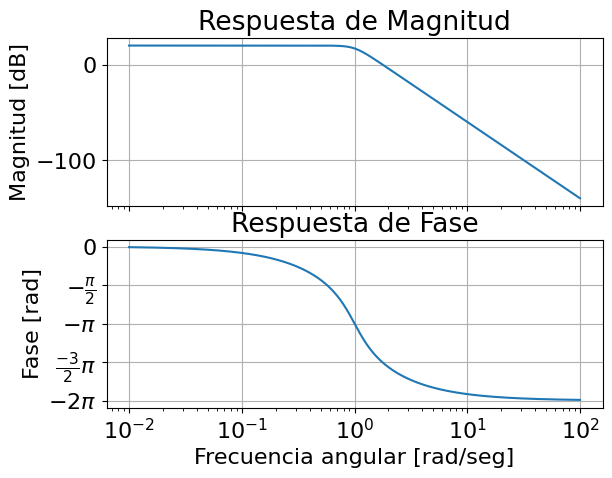

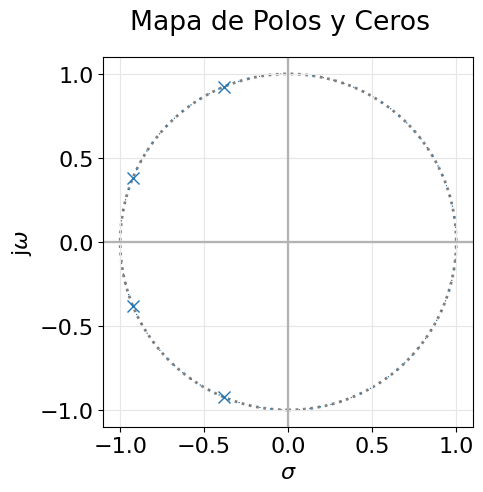

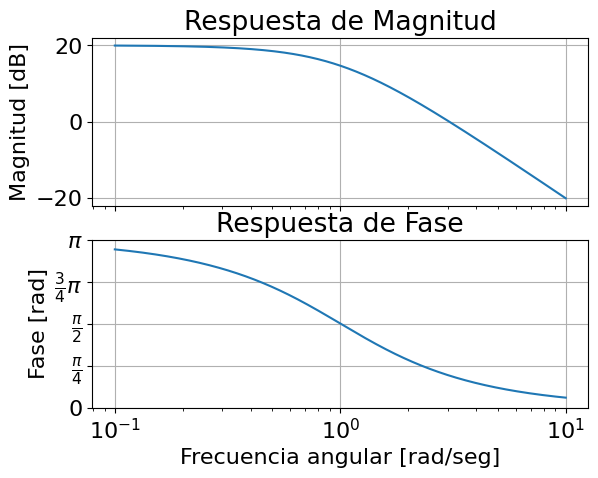

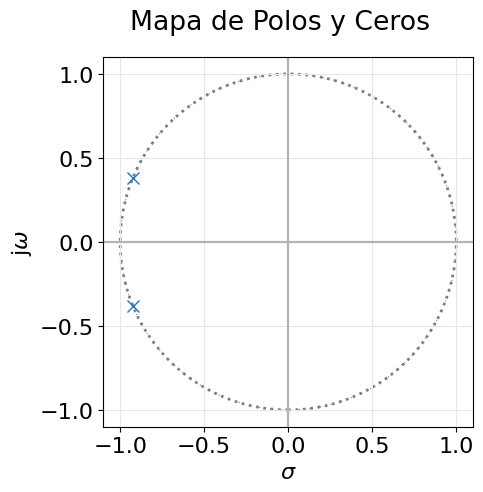

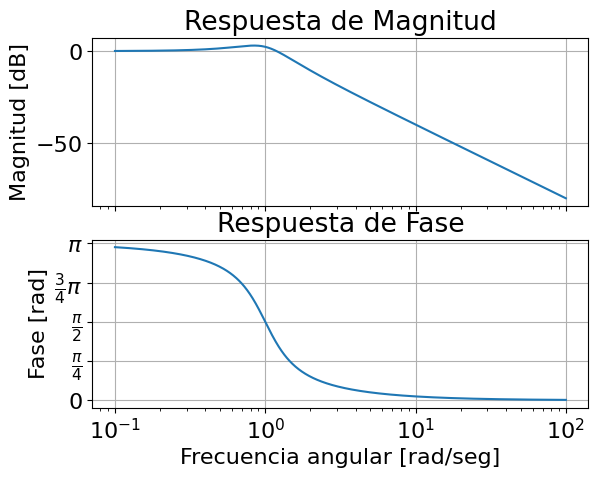

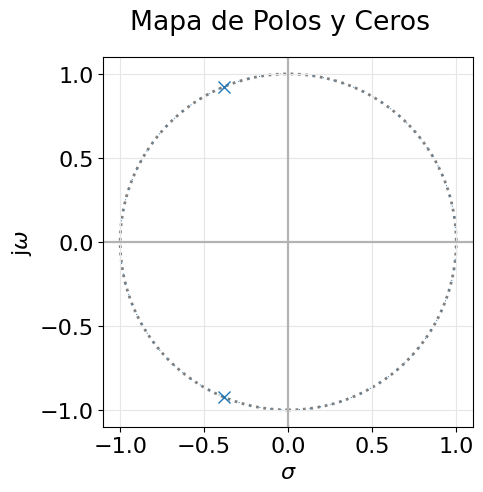

In [6]:
R1_1=0.1
R2_1=1/(2*(math.cos((1/8*math.pi))))
R1_2=1
R2_2=1/(2*(math.cos((3/8*math.pi))))
R3=1
C=1


num_1=np.array([-1/(R1_1*R3*C**2)])
den_1=np.array([1.,1/R2_1*C,1/R3**2*C**2])

num_2=np.array([-1/(R1_2*R3*C**2)])
den_2=np.array([1.,1/R2_2*C,1/R3**2*C**2])

a=1/R2_1*C
b=1/R2_2*C

num=np.array([10.])
den=np.array([1.,(a+b),(2+a*b),(a+b),+1])

H1=sig.TransferFunction(num_1,den_1)
H2=sig.TransferFunction(num_2,den_2)

H=sig.TransferFunction(num,den)
display(H)



_, axes_hdl = bodePlot(H)

plt.sca(axes_hdl[0])

pzmap(H)

display(H1)



_, axes_hdl = bodePlot(H1)

plt.sca(axes_hdl[0])

pzmap(H1)

display(H2)



_, axes_hdl = bodePlot(H2)

plt.sca(axes_hdl[0])

pzmap(H2)